<a href="https://colab.research.google.com/github/Sreraj/Machine-learning-Projects/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/Data (1).csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,5
four_g,5
int_memory,5
m_dep,5
mobile_wt,4
n_cores,4


In [ ]:
df.dropna(inplace=True)

# ***EDA***

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1238.270718,0.496233,1.522451,0.510799,4.307885,0.520844,32.074335,0.502009,140.263184,4.516323,9.909091,644.800603,1251.115520,2123.632848,12.307885,5.774485,11.001507,0.760924,0.501758,0.505274,1.499247
std,439.641057,0.500111,0.815499,0.500009,4.339735,0.499691,18.138177,0.288622,35.398777,2.291257,6.061019,442.951035,431.924893,1085.051293,4.213061,4.357385,5.464872,0.426626,0.500123,0.500098,1.118539
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.500000,875.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1615.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.500000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

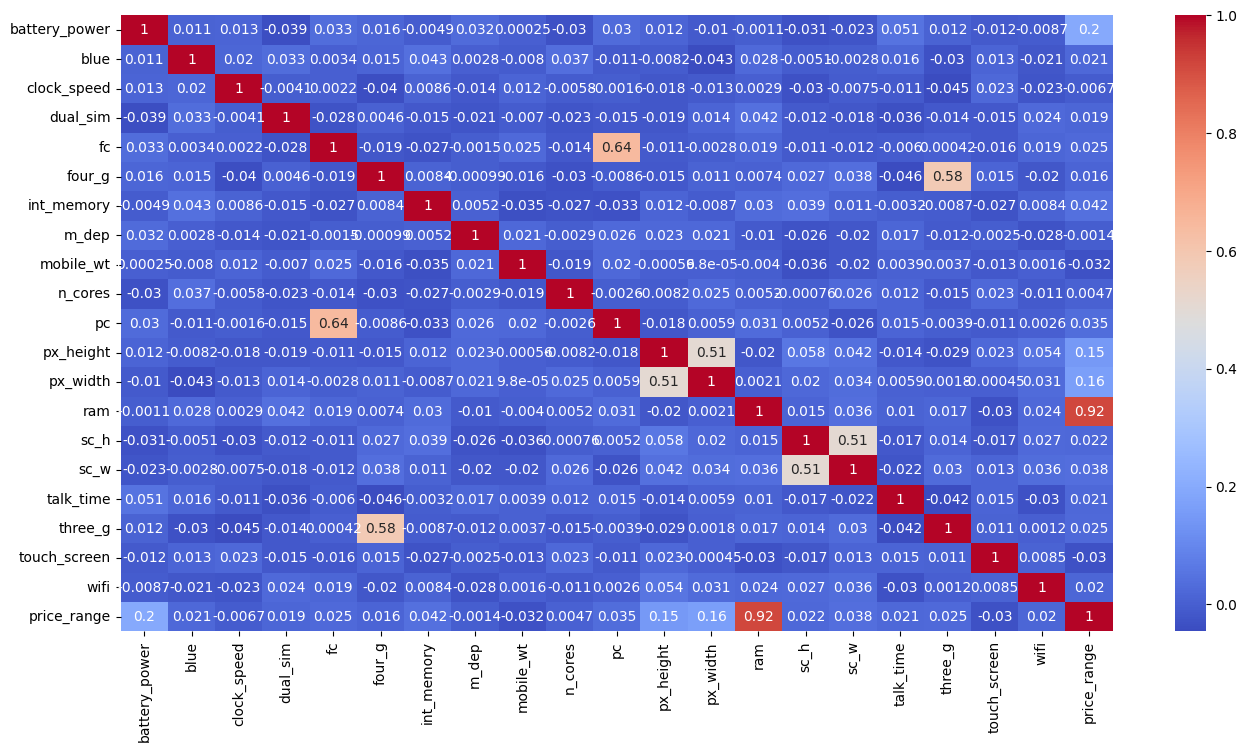

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only=True),annot = True,cmap='coolwarm')

<Axes: xlabel='price_range', ylabel='battery_power'>

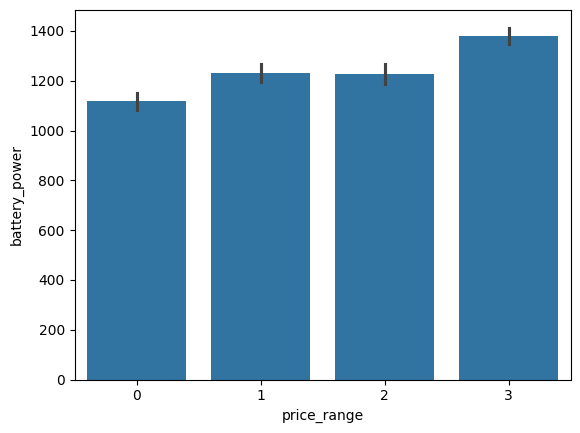

In [ ]:
# Plotting Relationship between Price and Batter_power

sns.barplot(x = df['price_range'], y= df['battery_power'])

price_range of 3 have more batter_power
price_range of 0 have less battery_power as compared to all

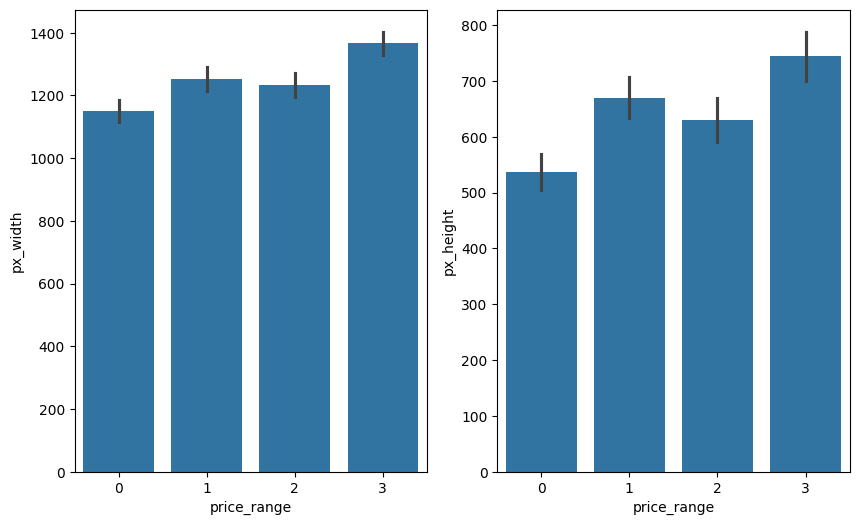

<Figure size 640x480 with 0 Axes>

In [ ]:
# plotting relationship between price  and px_width,px_height
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x = df['price_range'], y= df['px_width'])
plt.subplot(1,2,2)
sns.barplot(x = df['price_range'], y= df['px_height'])

plt.show()
plt.tight_layout()

price_range 3 has highest pixel height

price_range 3 has high pixel_width

<Axes: xlabel='price_range', ylabel='ram'>

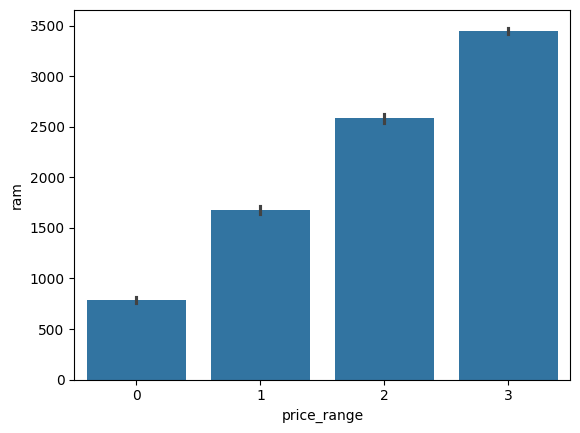

In [ ]:
# Plotting relationship bnetween price and ram

sns.barplot(x = df['price_range'],y = df['ram'])

price_range 3 has higher ram

<Axes: xlabel='price_range', ylabel='int_memory'>

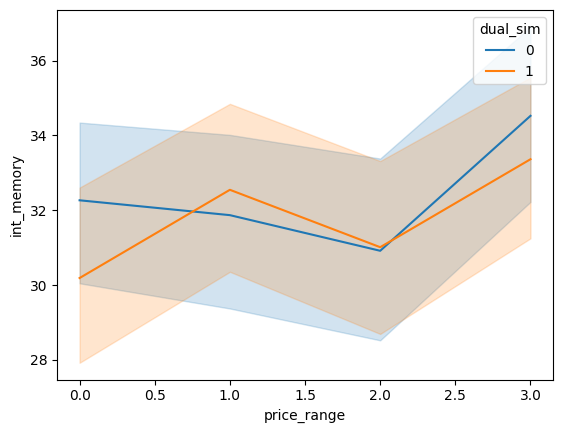

In [ ]:
sns.lineplot(x=df['price_range'],y=df['int_memory'],hue = df['dual_sim'])

# ***DATA PREPROCEESING AND MODEL CREATION***

In [ ]:
x = df.drop('price_range',axis=1)
y = df['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred

array([1, 3, 1, 3, 0, 0, 3, 3, 3, 1, 2, 3, 1, 2, 0, 2, 0, 1, 3, 3, 1, 0,
       0, 3, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 3, 1, 0, 1, 3, 3, 2, 2,
       3, 1, 1, 3, 0, 3, 1, 3, 0, 0, 0, 1, 0, 1, 0, 2, 3, 2, 2, 0, 1, 0,
       1, 3, 3, 1, 0, 2, 3, 1, 3, 3, 1, 3, 3, 2, 2, 1, 0, 2, 3, 3, 3, 1,
       1, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 1, 3, 1, 2, 1,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 0, 3, 3, 3, 0, 3, 2, 2, 1, 1,
       0, 2, 1, 1, 3, 2, 3, 0, 2, 2, 0, 3, 3, 0, 0, 2, 2, 2, 1, 3, 3, 0,
       1, 1, 1, 3, 1, 0, 1, 1, 0, 3, 2, 0, 1, 0, 3, 3, 2, 0, 1, 2, 3, 2,
       1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 3, 0, 3, 3, 2, 0, 2,
       3, 0, 2, 0, 3, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 3, 0, 1, 2, 3, 1,
       2, 2, 1, 3, 0, 2, 0, 1, 3, 0, 2, 2, 0, 2, 3, 1, 1, 0, 3, 2, 3, 3,
       2, 0, 3, 2, 0, 3, 2, 0, 2, 3, 0, 0, 1, 0, 1, 3, 3, 0, 1, 3, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 3, 3, 3, 3, 1, 2, 3, 1, 3, 2, 3, 3,
       3, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 3, 0, 3,

In [ ]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test,y_pred)
score

0.9214046822742475

In [ ]:
from sklearn.model_selection import GridSearchCV
cls1 = KNeighborsClassifier()
parameter = {'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}

gc = GridSearchCV(cls1,parameter,cv=10,scoring = 'accuracy')
gc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(gc.best_params_)

{'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
model1 = KNeighborsClassifier(n_neighbors = 11 ,weights='distance')
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
y_pred1

array([1, 3, 1, 3, 0, 0, 3, 3, 3, 1, 2, 3, 1, 2, 0, 2, 0, 1, 3, 3, 1, 0,
       0, 3, 2, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 3, 1, 0, 1, 2, 3, 2, 3,
       3, 1, 1, 3, 0, 2, 1, 3, 0, 0, 0, 1, 0, 1, 0, 2, 3, 2, 2, 0, 1, 0,
       1, 3, 3, 1, 0, 2, 3, 1, 3, 3, 1, 3, 3, 2, 2, 1, 0, 2, 3, 3, 3, 1,
       1, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 1, 3, 1, 2, 1,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 3, 0, 1, 0, 3, 3, 3, 0, 3, 2, 2, 1, 1,
       0, 2, 1, 1, 3, 2, 3, 0, 2, 2, 0, 3, 3, 0, 0, 2, 2, 2, 1, 3, 3, 0,
       1, 1, 1, 3, 1, 0, 1, 1, 0, 3, 2, 0, 1, 0, 3, 3, 2, 0, 1, 2, 3, 2,
       1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 3, 1, 3, 3, 2, 0, 2,
       3, 0, 2, 0, 3, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 3, 0, 1, 2, 3, 1,
       2, 2, 1, 3, 0, 2, 0, 1, 3, 0, 2, 2, 0, 2, 3, 1, 1, 0, 3, 2, 3, 3,
       2, 0, 3, 2, 0, 2, 2, 0, 2, 3, 0, 0, 1, 0, 1, 3, 3, 0, 1, 3, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 3, 3, 3, 3, 1, 2, 3, 1, 3, 2, 3, 3,
       3, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 3, 0, 3,

In [ ]:
score1 = accuracy_score(y_test,y_pred1)
score1

0.9280936454849499